# Gold Price VS Import Values and Export Values ##

We are interested in determing the relationship between gold price versus import values and gold price versus export values. To find out, we obtain monthly gold price from Internet, monthly import and export value for different countries from IMF data library. 

## Extract import values and Export values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf

Define functions to split values for different countries

In [2]:
# get import values for select country
def selectImportCountry(country):
    selector = import_data[['Country Name']].values == country
    temp = import_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [3]:
# get export vlues for select country
def selectExportCountry(country):
    selector = export_data[['Country Name']].values == country
    temp = export_data[selector]
    temp = temp[temp['Time Period'].astype('string').str.contains('M')]
    temp['Time Period'] = temp['Time Period'].astype('string').str.replace('M','-')
    temp['Time Period'] = pd.to_datetime(temp['Time Period'])
    temp.sort_values(['Time Period'], ascending = 1)
    return temp.drop(['Indicator Code','Country Code'], axis = 1)

In [4]:
# calculate the correlation between gold price and import or export values
def calCorrelation(dataFrame):
    corr = dataFrame['gold price'].corr(dataFrame['Value'])
    print corr

In [5]:
# normalized data
def normalizeDate(dataframe):
    dataframe['normalized gold price'] = \
    (dataframe['gold price']- dataframe['gold price'].mean())/(dataframe['gold price'].std()/np.sqrt(dataframe['Time Period'].size))
    dataframe['normalized value'] = \
    (dataframe['Value'] - dataframe['Value'].mean())/(dataframe['Value'].std()/np.sqrt(dataframe['Time Period'].size))                                                             

In [6]:
# calculate the correlation after normalization
def calNormCorrelation(dataFrame):
    normalCorr = dataFrame['normalized gold price'].corr(dataFrame['normalized value'])
    print normalCorr

In [7]:
# plot time vs gold price and import or export values
def plotTimeSeriesData(dataFrame, isImport):
    dataFrame.plot(x = ['Time Period'], y = ['normalized gold price','normalized value'])
    if(isImport):
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' import values')
    else:
        plt.title('Gold Price VS ' + dataFrame['Country Name'][0] + ' export values')

In [8]:
# summarize results
def summaryResult(dataFrame):
    x = dataFrame['normalized gold price']
    y = dataFrame['normalized value']
    results = smf.OLS(y,x).fit()
    print dataFrame['Country Name'][0]
    print results.summary()
    print "~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n \n \n"

Fetch date from pre-processed dataset

In [9]:
import_data = pd.read_csv('import_index_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
export_data = pd.read_csv('export_index_value.csv').drop('Unnamed: 0',1).drop('Status',1).drop('Unnamed: 7',1)
gold_price = pd.read_csv('gold price.csv')
gold_price.columns=['Time Period','gold price']
gold_price['Time Period'] = pd.to_datetime(gold_price['Time Period'])

In [10]:
# final all unique countries in both import data and export data
country_name_1 = import_data['Country Name'].unique()
country_name_2 = export_data['Country Name'].unique()
country_name = set(country_name_1).intersection(country_name_2)
country_name =list(country_name)


In [11]:
# generate import and exprot countries lists
country_name_import = []
country_name_export = []
N_countries = len(country_name)
for i in range(0,N_countries):
    country_name_import.append(country_name[i] + "" + "_import")
    country_name_export.append(country_name[i] + "" + "_export")

In [12]:
# extract import and export values for each country
for i in range(N_countries):
    country_name_import[i] = selectImportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)
    country_name_export[i] = selectExportCountry(country_name[i]).sort_values(['Time Period'], ascending = 1)

In [13]:
# delete empty dataframe in import data
temp_import_list = []
for i in range(N_countries):
    temp_import_df = country_name_import[i]
    if(temp_import_df.size != 0):
        temp_import_list.append(temp_import_df)
country_name_import = temp_import_list

In [14]:
# delete empty dataframe in import data
temp_export_list = []
for i in range(N_countries):
    temp_export_df = country_name_export[i]
    if(temp_export_df.size != 0):
        temp_export_list.append(temp_export_df)
country_name_export = temp_export_list

In [15]:
# create two new list to contain gold price versus import and export values for each countries
gold_country_import = []
gold_country_export = []
N_import = len(country_name_import)
N_export = len(country_name_export)
for i in range(N_import):
    gold_country_import.append("gold_" + country_name[i] + "_import")
for i in range(N_export):
    gold_country_export.append("gold_" + country_name[i] + "_export")

In [16]:
# concatenate gold price and import, export values
for i in range(N_import):
    gold_country_import[i] = pd.merge(gold_price, country_name_import[i], on='Time Period')
for i in range(N_export):
    gold_country_export[i] = pd.merge(gold_price, country_name_export[i], on='Time Period')

In [17]:
# normalize the data 
for i in range(N_import):
    normalizeDate(gold_country_import[i])
for i in range(N_export):
    normalizeDate(gold_country_export[i])

In [18]:
# calculate and print out correlation after normalization
for i in range(N_import):
    print "======================================="
    print gold_country_import[i]['Country Name'][0]
    print "Gold Price VS Import Value Correlation"
    calNormCorrelation(gold_country_import[i])
    print "=======================================\n"

Canada
Gold Price VS Import Value Correlation
0.830724539139

Italy
Gold Price VS Import Value Correlation
0.914432729188

Bangladesh
Gold Price VS Import Value Correlation
0.327793326516

Korea, Republic of
Gold Price VS Import Value Correlation
0.783139277503

France
Gold Price VS Import Value Correlation
0.434828279406

Ireland
Gold Price VS Import Value Correlation
0.803930664064

Euro Area
Gold Price VS Import Value Correlation
0.796585031665

Jordan
Gold Price VS Import Value Correlation
0.95088081867

Belgium
Gold Price VS Import Value Correlation
0.893777228797

Thailand
Gold Price VS Import Value Correlation
0.867995280328

Germany
Gold Price VS Import Value Correlation
0.785607055485

Spain
Gold Price VS Import Value Correlation
0.808016143201

Netherlands
Gold Price VS Import Value Correlation
0.78361065324

Denmark
Gold Price VS Import Value Correlation
0.731330283225

Finland
Gold Price VS Import Value Correlation
0.666811305756

China, P.R.: Hong Kong
Gold Price VS Import

In [19]:
# calculate and print out correlation after normalization
for i in range(N_export):
    print "======================================="
    print gold_country_export[i]['Country Name'][0]
    print "Gold Price VS Export Value Correlation"
    calNormCorrelation(gold_country_export[i])
    print "=======================================\n"

Canada
Gold Price VS Export Value Correlation
0.75938612152

Italy
Gold Price VS Export Value Correlation
0.82650807121

Bangladesh
Gold Price VS Export Value Correlation
0.15200149593

Korea, Republic of
Gold Price VS Export Value Correlation
0.422589603282

France
Gold Price VS Export Value Correlation
-0.500817666645

Ireland
Gold Price VS Export Value Correlation
0.600791756112

Euro Area
Gold Price VS Export Value Correlation
0.536215794354

Jordan
Gold Price VS Export Value Correlation
0.848783132941

Belgium
Gold Price VS Export Value Correlation
0.884262177597

Thailand
Gold Price VS Export Value Correlation
0.738424304128

Germany
Gold Price VS Export Value Correlation
0.615470838865

Spain
Gold Price VS Export Value Correlation
0.732902813174

Netherlands
Gold Price VS Export Value Correlation
0.683765616031

Denmark
Gold Price VS Export Value Correlation
0.601342704157

China, P.R.: Hong Kong
Gold Price VS Export Value Correlation
0.539478533498

Japan
Gold Price VS Export V

/Users/xuez/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


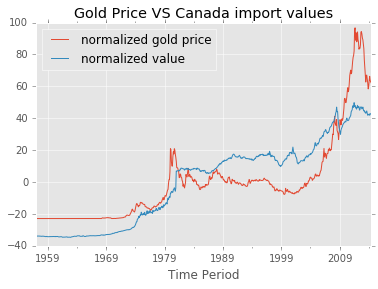

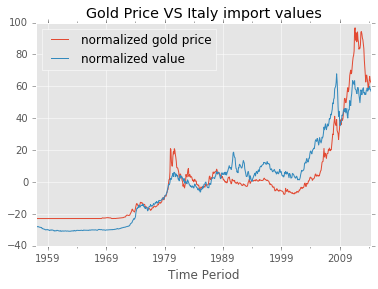

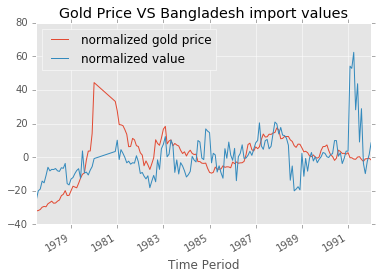

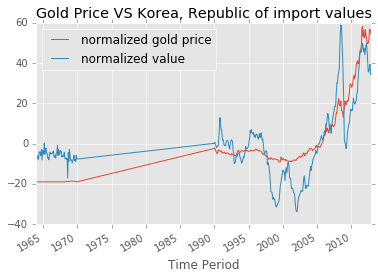

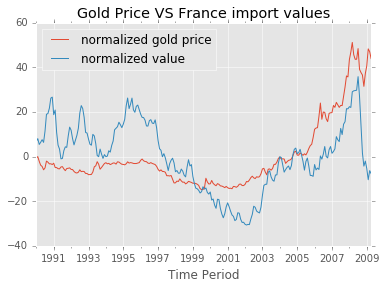

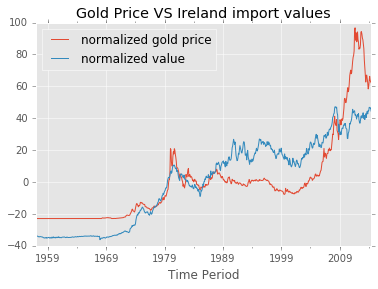

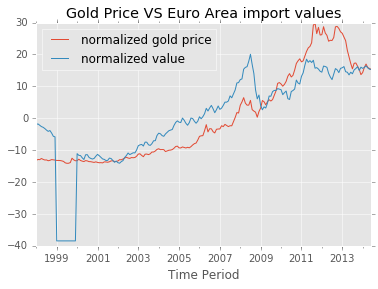

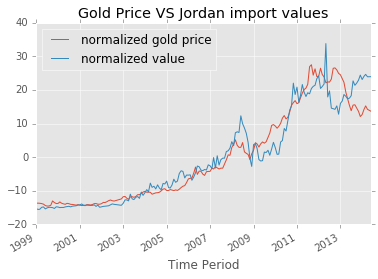

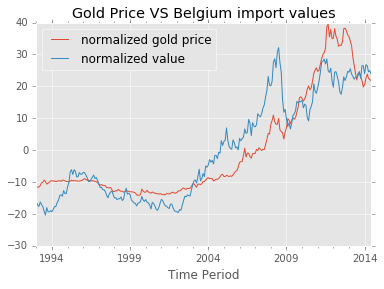

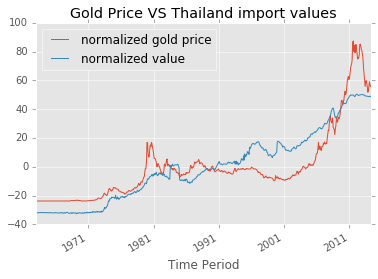

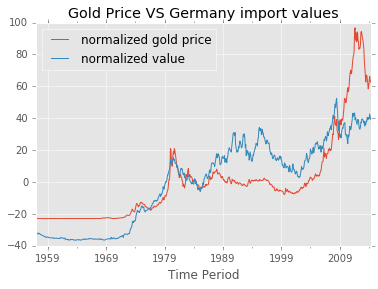

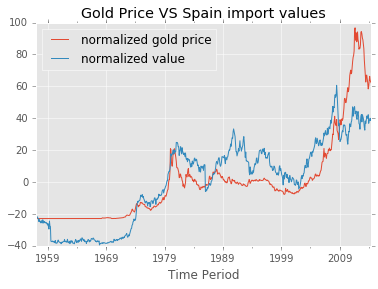

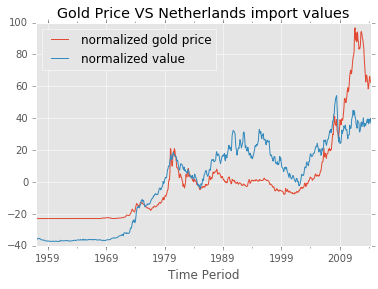

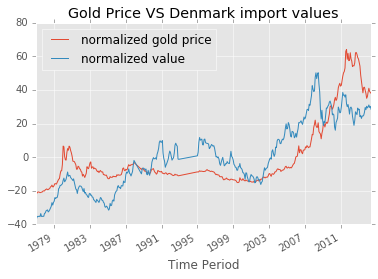

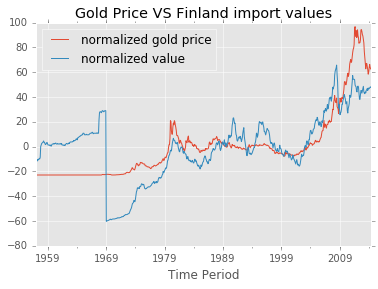

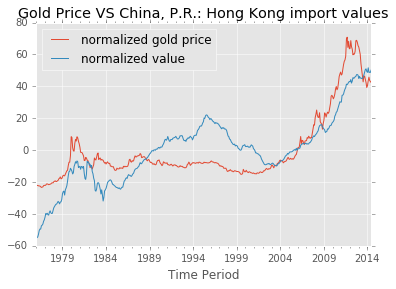

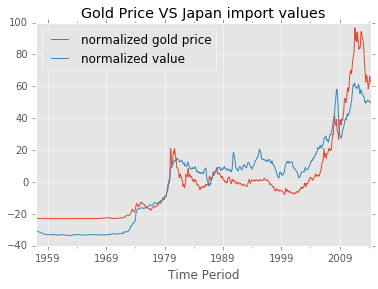

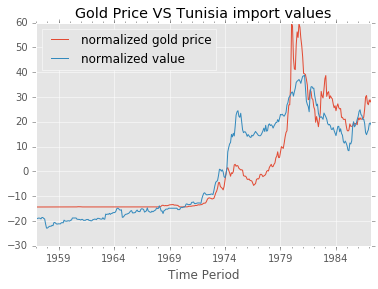

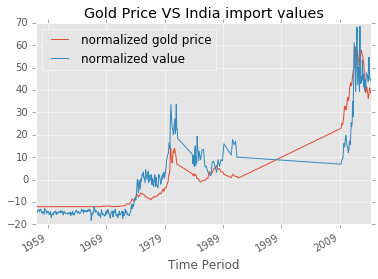

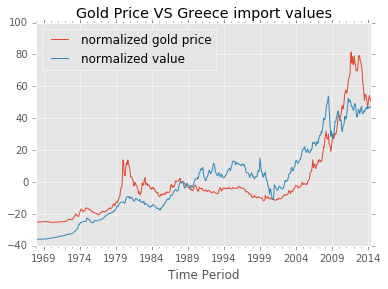

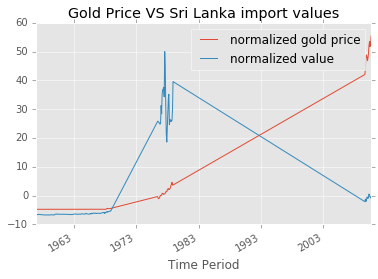

In [20]:
# plot time series vs gold price and import, export values
for i in range(N_import):
    plotTimeSeriesData(gold_country_import[i], True)

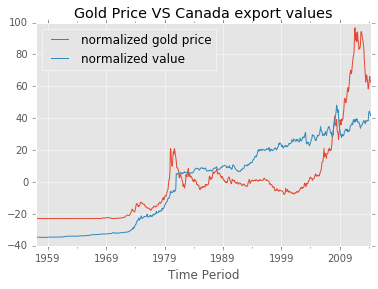

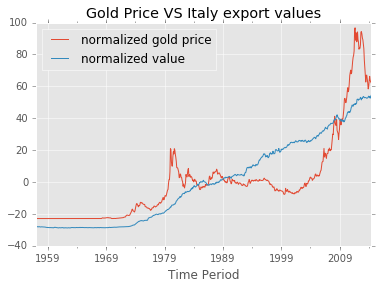

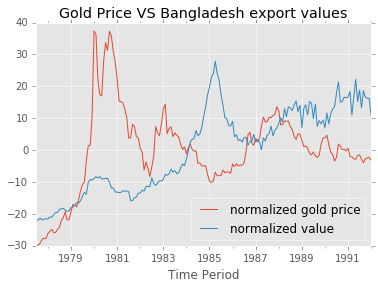

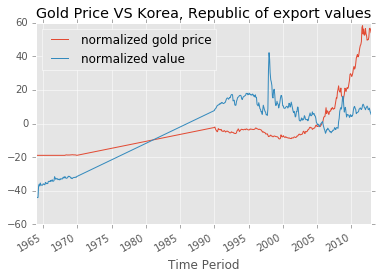

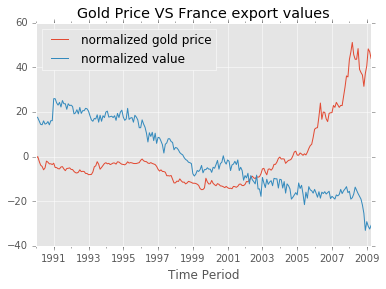

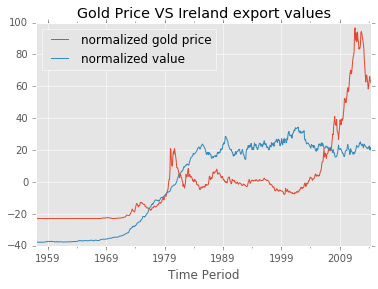

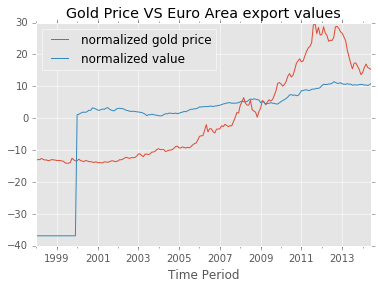

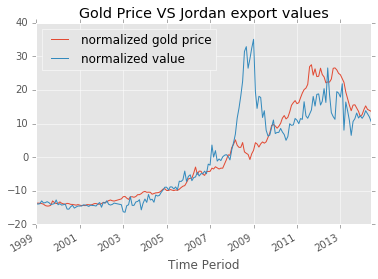

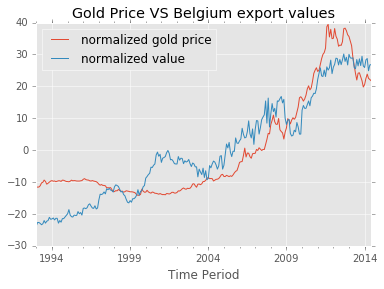

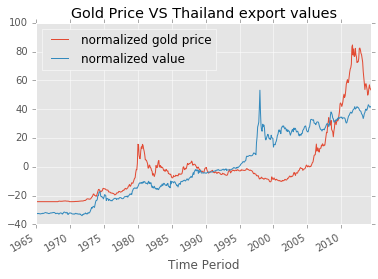

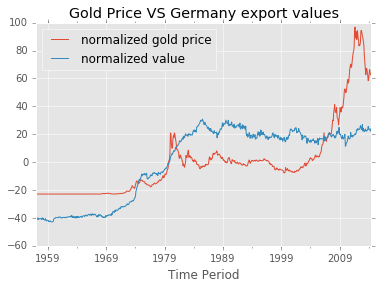

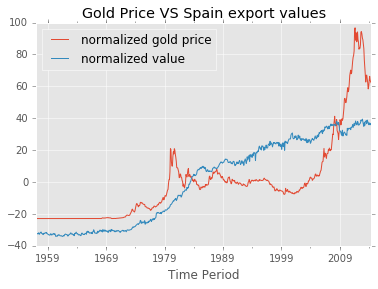

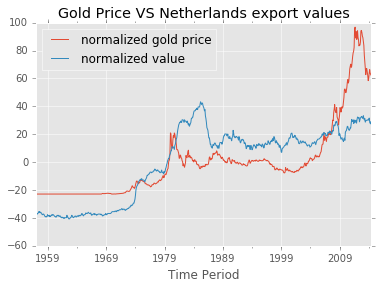

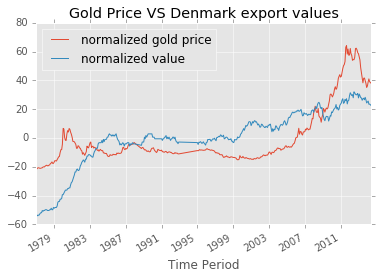

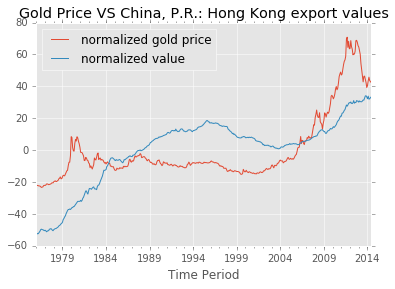

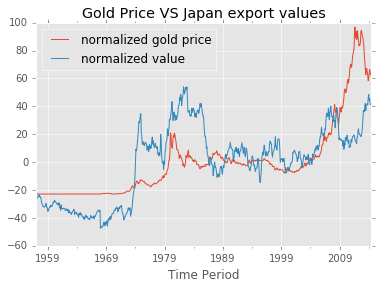

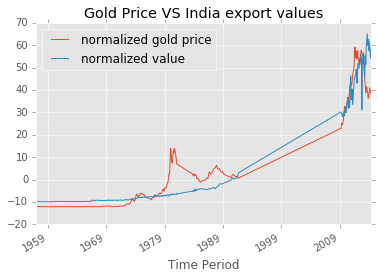

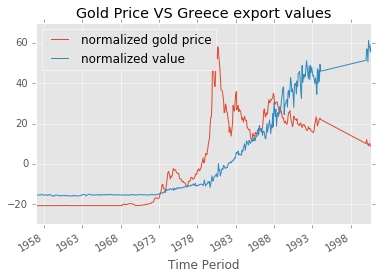

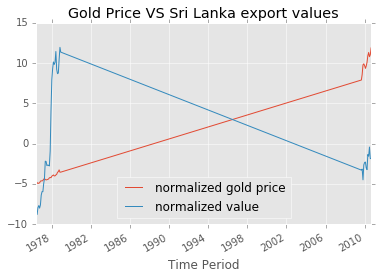

In [21]:
for i in range(N_export):
    plotTimeSeriesData(gold_country_export[i], False)

In [22]:
# Summarize the results
for i in range(N_import):
    summaryResult(gold_country_import[i])

Canada
                            OLS Regression Results                            
Dep. Variable:       normalized value   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1534.
Date:                Sat, 13 Feb 2016   Prob (F-statistic):          1.94e-177
Time:                        14:05:27   Log-Likelihood:                -2829.6
No. Observations:                 690   AIC:                             5661.
Df Residuals:                     689   BIC:                             5666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
normalized gold price  

In [23]:
# Summarize the results
for i in range(N_export):
    summaryResult(gold_country_export[i])

Canada
                            OLS Regression Results                            
Dep. Variable:       normalized value   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     938.6
Date:                Sat, 13 Feb 2016   Prob (F-statistic):          9.85e-131
Time:                        14:05:27   Log-Likelihood:                -2937.2
No. Observations:                 690   AIC:                             5876.
Df Residuals:                     689   BIC:                             5881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
normalized gold price  